<a href="https://colab.research.google.com/github/WillyG25/BigData/blob/main/WilfredAGExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Uploading my dataset
import pandas as pd
from google.colab import drive


flamingo = pd.read_csv ('/content/combined-data.csv')
flamingo = flamingo.rename(columns=lambda x:x.strip()) #removes whitespaces from headers if exists


In [ ]:
#Removing null values
print('Samples with Purchases : ' + str(flamingo['avg_price'].count()) + ' from  the total samples : ' + str(flamingo['userId'].count())) 

Samples with Purchases : 1411 from  the total samples : 4619


In [ ]:
flamingo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4619 entries, 0 to 4618
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userId            4619 non-null   int64  
 1   userSessionId     4619 non-null   int64  
 2   teamLevel         4619 non-null   int64  
 3   platformType      4619 non-null   object 
 4   count_gameclicks  4619 non-null   int64  
 5   count_hits        4619 non-null   int64  
 6   count_buyId       1411 non-null   float64
 7   avg_price         1411 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 288.8+ KB


array([[<Axes: title={'center': 'avg_price'}>]], dtype=object)

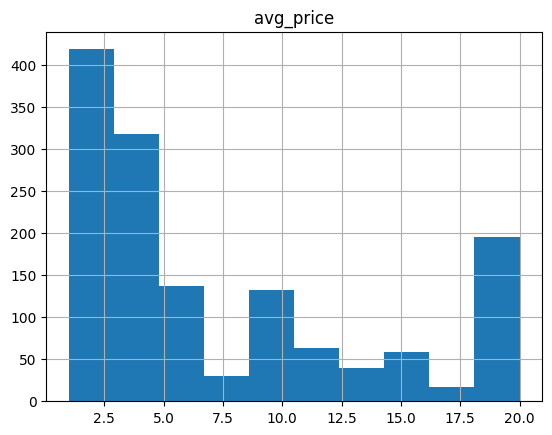

In [ ]:
#Plotting a histogram for the avg_price
from matplotlib import pyplot
pd.DataFrame.hist(flamingo[['avg_price']])

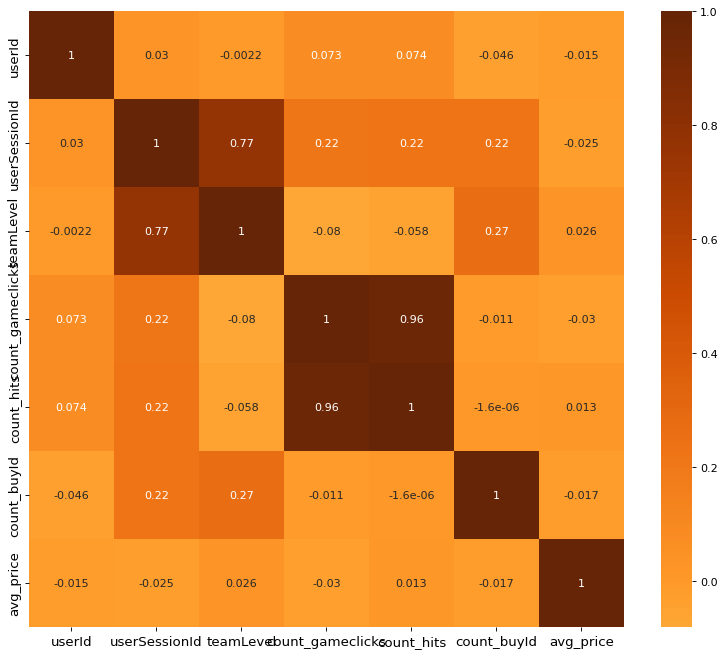

In [ ]:
#Visualising the correlogram of the variables
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(flamingo.corr(), xticklabels=flamingo.corr().columns, yticklabels=flamingo.corr().columns, cmap='YlOrBr', center=0, annot=True)


plt.title('', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
#Categorizing the users as BigSpenders or Savers based on avg_price
flamingo.replace("", np.nan, inplace=True)
flamingo = flamingo[np.isfinite(flamingo['count_buyId'])]
flamingo['user_category'] = np.where(flamingo['avg_price']> 5, 'BigSpenders', 'Savers')
flamingo.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price,user_category
4,937,5652,1,android,39,0,1.0,1.0,Savers
11,1623,5659,1,iphone,129,9,1.0,10.0,BigSpenders
13,83,5661,1,android,102,14,1.0,5.0,Savers
17,121,5665,1,android,39,4,1.0,3.0,Savers
18,462,5666,1,android,90,10,1.0,3.0,Savers


<Axes: xlabel='platformType', ylabel='count_gameclicks'>

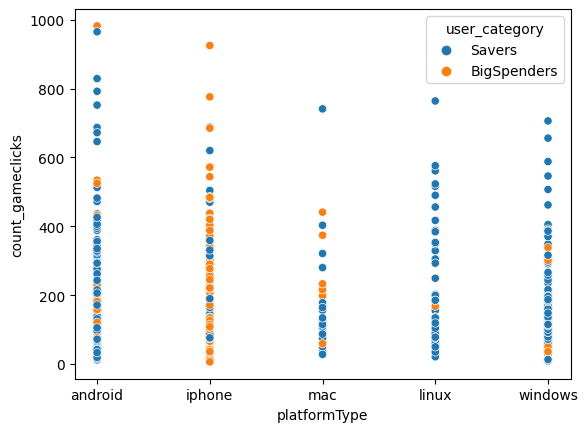

In [ ]:
#Plotting a dot plot for game clicks and type of spenders
sns.scatterplot(x='platformType',y='count_gameclicks',hue='user_category',data=flamingo)

<Axes: xlabel='platformType', ylabel='count'>

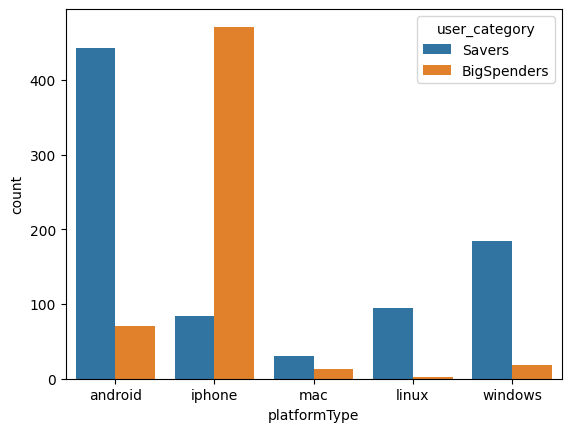

In [ ]:
#Visualising the platform type and the type of spenders
import seaborn as sns
sns.countplot(x="platformType", hue="user_category", data=flamingo)

In [ ]:
flamingo = flamingo.drop(['userId' , 'userSessionId' , 'avg_price'], axis = 1)
flamingo.head()

,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,user_category
4,1,android,39,0,1.0,Savers
11,1,iphone,129,9,1.0,BigSpenders
13,1,android,102,14,1.0,Savers
17,1,android,39,4,1.0,Savers
18,1,android,90,10,1.0,Savers


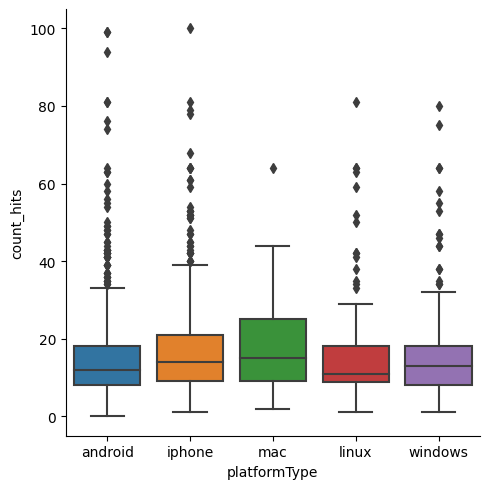

In [ ]:
#Box-plot showing the hits and the platform type
sns.catplot(x="platformType",y="count_hits",kind='box',data=flamingo)

In [ ]:
#Preparing the data set for the machine learning models
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(flamingo['platformType'])
print ("Categorical classes:", label_encoder.classes_)
integer_classes = label_encoder.transform(label_encoder.classes_)
print ("Integer classes:", integer_classes)
t = label_encoder.transform(flamingo['platformType'])
flamingo['EncPlatformType'] = t
# pinkFlam[['OS1', 'OS2', 'OS3', 'OS4' , 'OS5']] = pd.get_dummies(pinkFlam['platformType'])

Categorical classes: ['android' 'iphone' 'linux' 'mac' 'windows']
Integer classes: [0 1 2 3 4]


In [ ]:
#Splitting the data and using the decision tree and svm models for classification
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import svm

clf = tree.DecisionTreeClassifier()
clf_svm = svm.SVC()

X_train = flamingo[['teamLevel' ,'count_gameclicks' , 'count_hits','count_buyId' , 'EncPlatformType']][:846]
Y_train = flamingo['user_category'][:846]

# Train the Decision Tree classifier
clf = clf.fit(X_train, Y_train)

# Train the SVM classifier
clf_svm = clf_svm.fit(X_train, Y_train)

# Test data
X_test = flamingo[['teamLevel' ,'count_gameclicks' , 'count_hits','count_buyId' , 'EncPlatformType']][846:1411]
Y_test = flamingo['user_category'][846:1411]

# Predict using the Decision Tree classifier
Y_pred_tree = clf.predict(X_test)
acc_tree = accuracy_score(Y_test, Y_pred_tree)

# Predict using the SVM classifier
Y_pred_svm = clf_svm.predict(X_test)
acc_svm = accuracy_score(Y_test, Y_pred_svm)

# Print the accuracy scores of both models
print("Accuracy for Decision Tree:", acc_tree)
print("Accuracy for SVM:", acc_svm)


Accuracy for Decision Tree: 0.7876106194690266
Accuracy for SVM: 0.5716814159292035


In [ ]:
Y_prediction  = clf.predict(X_test)
np.unique(Y_prediction)
flamingo_evaluation = flamingo[846:1411]
flamingo_evaluation['Predicted_UserCategory'] = Y_prediction
flamingo_evaluation[['Predicted_UserCategory' , 'user_category' ]] 
y_true = flamingo_evaluation['user_category'] 
y_pred = flamingo_evaluation['Predicted_UserCategory']

In [ ]:
#Finding the precision and recall scores for the decision tree model
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, pos_label='Savers')
recall = recall_score(y_true, y_pred, pos_label='Savers')

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.8066465256797583
Recall: 0.826625386996904


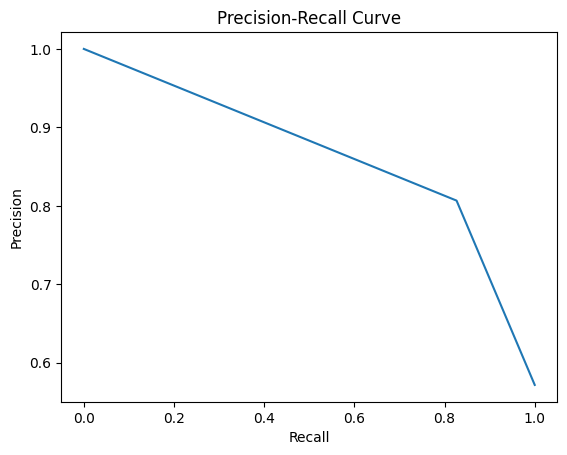

In [ ]:
#Plotting the precision-recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

Y_prediction  = clf.predict(X_test)
flamingo_evaluation = flamingo[846:1411]
flamingo_evaluation['Predicted_UserCategory'] = Y_prediction
y_true = flamingo_evaluation['user_category'] 
y_pred = flamingo_evaluation['Predicted_UserCategory']

precision, recall, thresholds = precision_recall_curve(y_true, clf.predict_proba(X_test)[:, 1], pos_label='Savers')

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()




In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [ ]:
import numpy as np
unique_label = np.unique(y_true)
print(pd.DataFrame(confusion_matrix(y_true, y_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

                  pred:BigSpenders  pred:Savers
true:BigSpenders               178           64
true:Savers                     56          267


Text(0.5, 23.52222222222222, 'Predicted User Category')

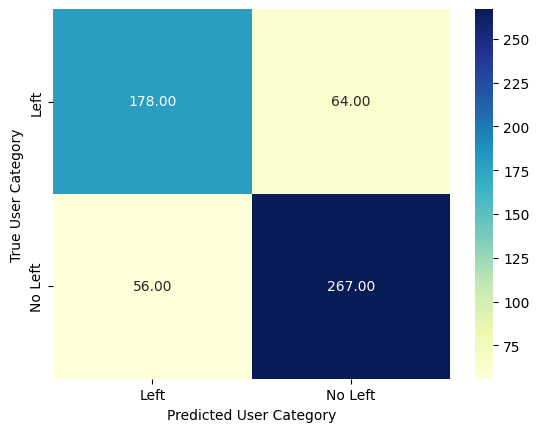

In [ ]:
#Visualising the confusion matrix for the decision tree model
cm = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label])

sns.heatmap(cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"],
         cmap="YlGnBu")

plt.ylabel('True User Category')
plt.xlabel('Predicted User Category')


In [ ]:
Y_prediction  = clf_svm.predict(X_test)
np.unique(Y_prediction)
flamingo_evaluation = flamingo[846:1411]
flamingo_evaluation['Predicted_UserCategory'] = Y_prediction
flamingo_evaluation[['Predicted_UserCategory' , 'user_category' ]] 
y_true = flamingo_evaluation['user_category'] 
y_pred = flamingo_evaluation['Predicted_UserCategory']

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [ ]:
import numpy as np
unique_label = np.unique(y_true)
print(pd.DataFrame(confusion_matrix(y_true, y_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

                  pred:BigSpenders  pred:Savers
true:BigSpenders                 0          242
true:Savers                      0          323


Text(0.5, 23.52222222222222, 'Predicted User Category')

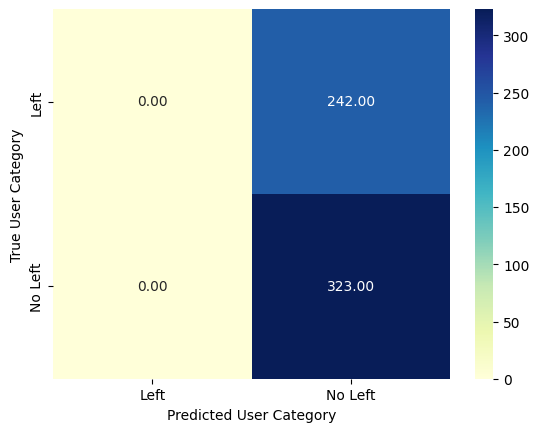

In [ ]:
#Confusion matrix for svm model
cm = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label])

sns.heatmap(cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"],
         cmap="YlGnBu")

plt.ylabel('True User Category')
plt.xlabel('Predicted User Category')


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

1.2.2


In [ ]:
#Finding the precision and recall scores for the svm model
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, pos_label='Savers')
recall = recall_score(y_true, y_pred, pos_label='Savers')

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.5716814159292035
Recall: 1.0


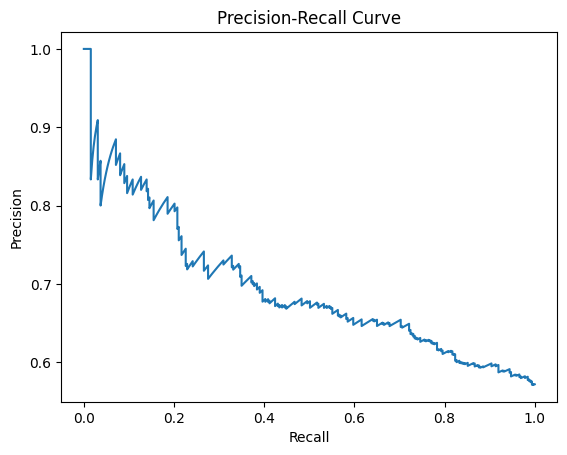

In [ ]:
#Visualising the precision-recall curve for the svm model
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

Y_prediction  = clf_svm.predict(X_test)
flamingo_evaluation = flamingo[846:1411]
flamingo_evaluation['Predicted_UserCategory'] = Y_prediction
y_true = flamingo_evaluation['user_category'] 
y_pred = flamingo_evaluation['Predicted_UserCategory']

precision, recall, thresholds = precision_recall_curve(y_true, clf_svm.decision_function(X_test), pos_label='Savers')

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Visualising the decision tree and saving the file due due to its resolution
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=['teamLevel', 'count_gameclicks', 'count_hits', 'count_buyId', 'EncPlatformType'], 
                           class_names=['category_0', 'category_1', 'category_2'], 
                           filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')


True

In [ ]:
#Using k-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = flamingo[['teamLevel', 'count_gameclicks', 'count_hits', 'count_buyId', 'EncPlatformType']]

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Train the K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_std)

# Get the cluster assignments and centroids
labels = kmeans.predict(X_std)
centroids = kmeans.cluster_centers_

# Print the cluster assignments and centroids
print("Cluster labels:", labels)
print("Centroids:\n", centroids)


Cluster labels: [2 2 2 ... 0 2 0]
Centroids:
 [[ 0.768113   -0.18976962 -0.16396912  0.39357992  0.0579097 ]
 [-0.60276041  2.27173321  2.21936048 -0.2279697   0.02545533]
 [-0.85940311 -0.42212679 -0.44139202 -0.46453075 -0.08598193]]
